In [ ]:
# https://www.youtube.com/@PW-Foundation/videos

In [36]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import re
import time
from csv import DictWriter


headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"}
youtube_url = "https://www.youtube.com/@PW-Foundation/videos"

urlclient = urlopen(youtube_url)
url_data = urlclient.read()

soup = bs(url_data,'html.parser')
#{"contents":"richItemRenderer"}
div_SOUP1 = soup.findAll('script', {})

temp_list=""
for i in range(len(div_SOUP1)):
    try:
        if(type(div_SOUP1[i].text.index('"richItemRenderer":'))== int):
            temp_list+= div_SOUP1[i].text
    
    except:
        pass


get_text = temp_list.split('"richItemRenderer":')

del get_text[0]
my_results = []
for i in get_text[0:5]:
    
    vid_title = (re.findall('"title":{"runs":\[{"text":"(.*?)"', i))
    videoId = re.findall('"videoId":"(.*?)"', i)
    vid_link = ("https://www.youtube.com//watch?v="+str(videoId[0]))
    vid_thumbnail = (re.findall('"thumbnail":{"thumbnails":\[{"url":"(.*?)"', i))
    vid_count = (re.findall('"viewCountText":{"simpleText":"(.*?)"', i))
    vid_pub_time = (re.findall('"publishedTimeText":{"simpleText":"(.*?)"', i))
    date_write= str(vid_link)+","+ str(vid_thumbnail) +","+ str(vid_title) +","+ str(vid_count) +","+ str(vid_pub_time) +","+"\n"
    result_dict = {"Video_link": vid_link , "thumbnail": vid_thumbnail, "Video_title": vid_title, "No_views": vid_count,
                     "Video_publish": vid_pub_time}
    my_results.append(result_dict)


field_names  = ['Video_link','thumbnail', 'Video_title', 'No_views', 'Video_publish']

with open('Youtube.csv', 'a') as f_object:
    dictwriter_object = DictWriter(f_object, fieldnames=field_names)
    dictwriter_object.writeheader()
    for results in my_results:
        dictwriter_object.writerow(results)
        print (results)
        

f_object.close()

{'Video_link': 'https://www.youtube.com//watch?v=ecGcmstmnGA', 'thumbnail': ['https://i.ytimg.com/vi/ecGcmstmnGA/hqdefault.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==\\u0026rs=AOn4CLDb3NBxkCxXCiR9bHz4KT9ieZWRUA'], 'Video_title': ['Finally The Wait is Over 🔥 || Icse Batch Coming Soon || Must Watch 🔥🔥'], 'No_views': ['15,183 views'], 'Video_publish': ['2 days ago']}
{'Video_link': 'https://www.youtube.com//watch?v=08WWij66k8A', 'thumbnail': ['https://i.ytimg.com/vi/08WWij66k8A/hqdefault.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==\\u0026rs=AOn4CLB9yhnduhIJSGQN8FU8kUoH-B0Q4g'], 'Video_title': ["Best Strategy To Start Class-9th SST || Don't Miss This Video🛑 || Complete Roadmap"], 'No_views': ['15,964 views'], 'Video_publish': ['4 days ago']}
{'Video_link': 'https://www.youtube.com//watch?v=bXpeyKIVioA', 'thumbnail': ['https://i.ytimg.com/vi/bXpeyKIVioA/hqdefault.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==\\u0026rs=AOn4CLAC1jbXqT

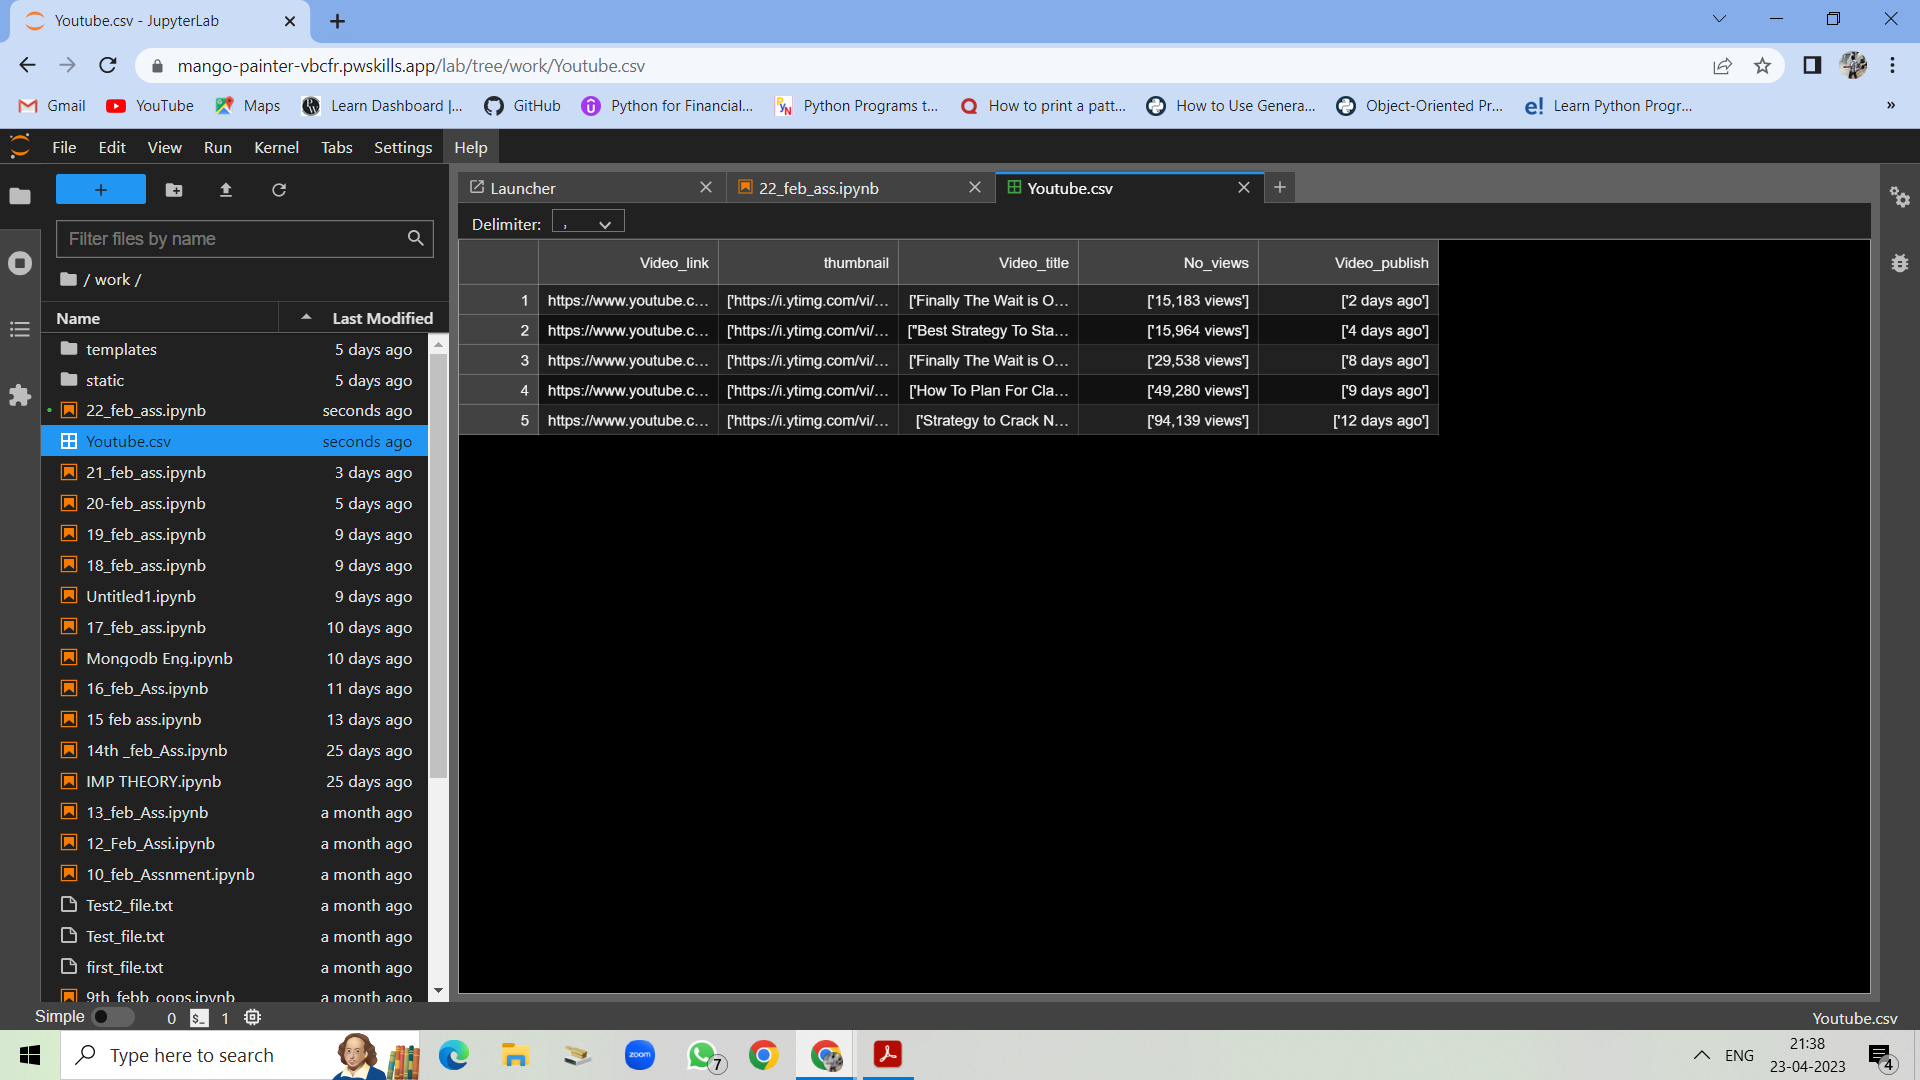